<center><img src="picture.jpg" width="600" height="500" /></center>

<center><img src="ml.JPG" width="600" height="600" /></center>

# Basic Implementation

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Dataset

<center><img src="iris.png" width="600" height="600" /></center>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X= iris.data
y=iris.target

In [ ]:
X

In [ ]:
y

In [ ]:
X.shape, y.shape

In [ ]:
x_train=X[0:120,:]
y_train=y[0:120]

x_test=X[120:,:]
y_test=y[120:]

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model= clf.fit(x_train, y_train)


# from sklearn.svm import SVC
# clf = SVC(gamma='auto')
# model=clf.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred.shape

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

# Label preparation (To categorical)

In [ ]:
y_categorical=np.zeros((150,3))
for i in range(150):
    y_categorical[i,y[i]]=1
y_categorical

# Feature normalization

### MinMAX

##### 1. Scikit learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)


In [ ]:
X

##### 2. Scratch

In [ ]:
n_feature=X.shape[1]
X_normalized=np.zeros_like(X)

for i in range(n_feature):

    Min=np.min(X[:,i])
    Max=np.max(X[:,i])
    
    X_normalized[:,i]=(X[:,i]-Min)/(Max-Min)

### Z Score

In [ ]:
n_feature=X.shape[1]
X_normalized=np.zeros_like(X)

for i in range(n_feature):

    Mean=np.mean(X[:,i])
    Std=np.std(X[:,i])
    
    X_normalized[:,i]=(X[:,i]-Mean)/Std


# Data Shuffleing

In [ ]:
index_=np.random.permutation(150)
index_

In [ ]:
index_=np.random.permutation(150)

x_new=X_normalized[index_]
y_new=y_categorical[index_]

In [ ]:
y_new

In [ ]:
indexes = np.arange(x_new.shape[0])

np.random.shuffle(indexes)
train_index = indexes[0: int(0.9 * x_new.shape[0])]
test_index = indexes[int(0.9 * x_new.shape[0]):]

x_train = x_new[train_index]
x_test = x_new[test_index]

y_train = y_new[train_index]
y_test = y_new[test_index]

In [ ]:
print('X Train shape: ',x_train.shape)
print('Y Train shape: ',y_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Test shape: ',y_test.shape)

## Model Training

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model= clf.fit(x_train, y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

# Wildfire Growth Prediction

# Load Data

In [166]:
path_input='E:/Deep Course/Weeks/W4/Data/Input_data.npy'
path_label='E:/Deep Course/Weeks/W4/Data/Output_data.npy'

input_data=np.load(path_input)
label_data=np.load(path_label)

In [167]:
print('Input Shape: ',input_data.shape)
print('Label Shape: ',label_data.shape)

Input Shape:  (18545, 64, 64, 12)
Label Shape:  (18545, 64, 64, 1)


# Data Visualization

### All variables in one subplot

In [168]:
random_number=np.random.randint(0,input_data.shape[0]-1)
random_number

14409

In [169]:
name_list=['Elevation','W Direction','W Speed','Min Temp',
           'Max Temp','Humidity','Precipitation','Drought',
           'Veg','Pop Den','ERC','Previous']

plt.figure(figsize=(16,4),dpi=200)

for i in range(12):
    plt.subplot(1,13,i+1)
    plt.imshow(input_data[random_number,:,:,i],cmap='jet')
    plt.xticks([])
    plt.yticks([])
    plt.title(name_list[i])

    if i==11:
        plt.subplot(1,13,13)
        plt.imshow(label_data[random_number,:,:,0],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        plt.title('Label')

plt.show()

### Variable Visualization

In [170]:
random_number=np.random.randint(0,input_data.shape[0]-1)
random_number

85

In [171]:
band_number=np.random.randint(0,input_data.shape[3]-1)
band_number

2

In [ ]:
name_list=['Elevation','W Direction','W Speed','Min Temp',
           'Max Temp','Humidity','Precipitation','Drought',
           'Veg','Pop Den','ERC','Previous']


plt.figure(figsize=(16,4),dpi=200)

plt.imshow(input_data[random_number,:,:,band_number],cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title(name_list[band_number])

plt.show()

# Data Preprocessing

### Remove pixels with ncertainty

In [25]:
np.sum(input_data[4,:,:,11]==-1)

395

In [21]:
sample_index=[]

for i in range(input_data.shape[0]):

    if np.sum(input_data[i,:,:,11]==-1)>0 or np.sum(label_data[i,:,:,0]==-1)>0:
        pass
    else:
        sample_index.append(i)

In [26]:
len(sample_index)

10303

In [31]:
n_samples=len(sample_index)
width=input_data.shape[1]
height=input_data.shape[2]
n_var=input_data.shape[3]

X_input=np.zeros((n_samples,width,height,n_var),dtype='float32')
y=np.zeros((n_samples,width,height,1),dtype='float32')

In [32]:
for i in range(len(sample_index)):
    
    X_input[i]=input_data[sample_index[i]]
    y[i]= label_data[sample_index[i]]  

In [33]:
del input_data
del label_data

In [34]:
X_input.shape

(10303, 64, 64, 12)

In [35]:
y.shape

(10303, 64, 64, 1)

### Update labels

In [36]:
labels=np.zeros((y.shape[0],1),dtype='float32')

for i in range(labels.shape[0]):
    if np.sum(y[i,:,:,0])>np.sum(X_input[i,:,:,11]):
        labels[i,0]=1

    

In [37]:
print('Number of 1s:',np.sum(labels==1))
print('Number of 0s:',np.sum(labels==0))

Number of 1s: 6303
Number of 0s: 4000


# Balance Dataset

In [38]:
Min_samles=np.min([np.sum(labels==1),np.sum(labels==0)])
Min_samles

4000

In [39]:
Data=np.zeros((Min_samles*2,X_input.shape[1],X_input.shape[2],X_input.shape[3]),dtype='float32')

c=0
for i in range(X_input.shape[0]):
    if labels[i,0]==0:
        Data[c]=X_input[i]
        c=c+1

In [40]:
c

4000

In [41]:
New_labels=np.zeros((Min_samles*2,1),dtype='float32')
New_labels[Min_samles:]=1

In [42]:
New_labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [43]:
Ones_index=[]

for i in range(X_input.shape[0]):
    if labels[i,0]==1:
        Ones_index.append(i)
Ones_index

[0,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 38,
 41,
 42,
 43,
 44,
 47,
 48,
 49,
 50,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 121,
 122,
 127,
 130,
 132,
 133,
 134,
 135,
 137,
 139,
 140,
 141,
 142,
 143,
 145,
 147,
 150,
 151,
 152,
 158,
 162,
 163,
 164,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 176,
 177,
 180,
 181,
 185,
 187,
 188,
 193,
 196,
 197,
 200,
 204,
 206,
 209,
 210,
 212,
 219,
 220,
 222,
 223,
 227,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 250,
 251,
 252,
 254,
 258,
 259,
 260,
 262,
 263,
 264,
 265,
 266,
 267,
 272,
 273,
 277,
 278,
 280,
 281,
 282,
 283,
 284,
 285,
 28

In [44]:
len(Ones_index)

6303

In [45]:
random.shuffle(Ones_index)
Ones_index

[704,
 3974,
 1380,
 4935,
 8856,
 3909,
 9396,
 7731,
 2589,
 8957,
 3352,
 3002,
 4993,
 6231,
 7726,
 7984,
 5324,
 3930,
 3615,
 2068,
 6909,
 8497,
 4580,
 6188,
 1648,
 7842,
 4798,
 7660,
 5171,
 6261,
 9508,
 4110,
 6602,
 5098,
 7279,
 2826,
 8451,
 4432,
 9020,
 2435,
 8063,
 2745,
 4938,
 3155,
 3871,
 1673,
 8117,
 7845,
 7300,
 315,
 8693,
 9680,
 8855,
 6102,
 5510,
 5961,
 2146,
 2657,
 2485,
 5600,
 7394,
 6882,
 7771,
 10213,
 8937,
 1028,
 2600,
 4701,
 8564,
 6898,
 5378,
 8227,
 1876,
 6239,
 3497,
 5,
 5860,
 4,
 9978,
 3553,
 6838,
 9707,
 6679,
 1417,
 3148,
 2717,
 7500,
 5293,
 6761,
 2670,
 8014,
 1774,
 7417,
 8445,
 1822,
 7225,
 5675,
 755,
 9897,
 3735,
 1366,
 1120,
 10061,
 44,
 7627,
 4187,
 10128,
 5408,
 6222,
 9240,
 204,
 7113,
 4958,
 3819,
 1377,
 1771,
 2705,
 5930,
 1861,
 5804,
 1600,
 1842,
 1475,
 9728,
 4738,
 6296,
 2733,
 7380,
 525,
 8840,
 9371,
 7809,
 2555,
 9502,
 4378,
 3451,
 9725,
 4367,
 4134,
 4758,
 2824,
 367,
 794,
 8033,
 806

In [47]:
Ones_index=Ones_index[0:4000]
len(Ones_index)

4000

In [48]:
X_input[Ones_index].shape

(4000, 64, 64, 12)

In [49]:
Data[4000:]=X_input[Ones_index]

In [50]:
Data.shape

(8000, 64, 64, 12)

### Shuffle Data

In [53]:
indexes = np.arange(Data.shape[0])
indexes
np.random.shuffle(indexes)
indexes

array([5009, 7380, 1657, ..., 7324, 3214, 3096])

In [54]:


Input_data = Data[indexes]
label_data = New_labels[indexes]

label_data[0:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [57]:
New_labels[-10:]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

## Scaling

### MinMax

In [58]:
Data.shape

(8000, 64, 64, 12)

In [59]:
Max_list=[]
Min_list=[]

for i in range(Data.shape[3]):
    
    Max=np.max(Data[:,:,:,i])
    Max_list.append(Max)

    Min=np.min(Data[:,:,:,i])
    Min_list.append(Min)

In [60]:
Max_list

[4151.0,
 37463.168,
 75.220535,
 716.6276,
 1229.8488,
 0.06229025,
 136.81561,
 52.268967,
 9961.0,
 27103.605,
 2470.8823,
 1.0]

In [61]:
Min_list

[-45.0,
 -342711.88,
 -53.425995,
 0.0,
 0.0,
 -0.1289879,
 -54.545547,
 -152.90793,
 -9531.0,
 0.0,
 -529.32404,
 0.0]

In [62]:
Normalized_Data=np.zeros_like(Data)
for i in range(len(Min_list)-1):

    Normalized_Data[:,:,:,i]=(Data[:,:,:,i]-Min_list[i])/(Max_list[i]-Min_list[i])

In [63]:
Normalized_Data.max()

1.0

In [64]:
Normalized_Data.min()

0.0

### Z Score

In [65]:
Data.shape

(8000, 64, 64, 12)

In [66]:
Mean_list=[]
Std_list=[]

for i in range(Data.shape[3]):
    
    Mean=np.mean(Data[:,:,:,i])
    Mean_list.append(Mean)

    Std=np.std(Data[:,:,:,i])
    Std_list.append(Std)

In [67]:
Mean_list

[973.52264,
 173.41318,
 3.579714,
 280.3689,
 296.76123,
 0.0061948234,
 0.1300732,
 -0.7907689,
 5296.2856,
 25.170849,
 58.323036,
 0.010265838]

In [68]:
Std_list

[854.0629,
 2458.9702,
 1.3120763,
 29.71861,
 31.400196,
 0.0034265656,
 0.9194355,
 2.4004607,
 2210.4966,
 206.46786,
 25.684507,
 0.100798905]

In [69]:
Normalized_Data=np.zeros_like(Data)
for i in range(len(Min_list)-1):

    Normalized_Data[:,:,:,i]=(Data[:,:,:,i]-Mean_list[i])/Std_list[i]

In [70]:
Normalized_Data.max()

148.66246

In [71]:
Normalized_Data.min()

-139.44263

In [72]:
Normalized_Data.shape

(8000, 64, 64, 12)

### Prepare input shape fo ML Methods

In [73]:
n_rows=Normalized_Data.shape[1]
n_col=Normalized_Data.shape[2]
n_variables=Normalized_Data.shape[3]

n_features=n_rows*n_col*n_variables
n_features

49152

In [74]:
X=np.zeros((Normalized_Data.shape[0],n_features),dtype='float32')
Y=label_data
X.shape, Y.shape

((8000, 49152), (8000, 1))

In [75]:
for i in range(X.shape[0]):
    X[i]=Normalized_Data[i].flatten()

In [76]:
X.shape

(8000, 49152)

In [77]:
Y.shape

(8000, 1)

In [78]:
indexes = np.arange(X.shape[0])

np.random.shuffle(indexes)
train_index = indexes[0: int(0.9 * X.shape[0])]
test_index = indexes[int(0.9 * X.shape[0]):]

x_train = X[train_index]
x_test = X[test_index]

y_train = Y[train_index]
y_test = Y[test_index]

In [81]:
print('X Train shape: ',x_train.shape)
print('Y Train shape: ',y_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Test shape: ',y_test.shape)

X Train shape:  (7200, 49152)
Y Train shape:  (7200, 1)
X Test shape:  (800, 49152)
Y Test shape:  (800, 1)


In [97]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [98]:
# clf = tree.DecisionTreeClassifier()
# clf.fit(x_train, y_train)


# clf = RandomForestClassifier(n_estimators=200,max_depth=10, random_state=0)
# clf.fit(x_train, y_train)

clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

C:\Users\Mohamad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohamad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [92]:
from sklearn.metrics import accuracy_score

In [99]:
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.51375

In [94]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y_test, y_pred)

array([[202, 202],
       [187, 209]], dtype=int64)

# Tap30 demand prediction

### Load packeages

In [101]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

### Load data

In [102]:
data=np.genfromtxt("E:/Deep Course/Weeks/W4/Data/Tap30Data.txt", delimiter=" ") 
data.shape

(5856, 8)

### Repalacing Missing Values

In [104]:
t=data==-1
data[t]=0

In [105]:
t

array([[False, False, False, ...,  True,  True, False],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ...,  True, False,  True],
       [False, False,  True, ..., False, False, False]])

### Prepare data format

In [106]:
n_samples=int(data.shape[0]/8)
width=8
heigh=8

dataset=np.zeros((n_samples,width,heigh),dtype='float32')

for i in range(n_samples):
    arr=data[i*8:(i+1)*8,:]
    dataset[i,:,:]=arr
    
dataset.shape

(732, 8, 8)

In [107]:
arr.shape

(8, 8)

### Prepare input and label

In [108]:
dataset.shape

(732, 8, 8)

In [113]:
time_step=2

n_samples=dataset.shape[0]-time_step
width=8
height=8

Input=np.zeros((n_samples,time_step,width,height),dtype='float32')
output=np.zeros((n_samples,width,height),dtype='float32')

c=0
for i in range(n_samples):
    for j in range(time_step):
        Input[i,j,:,:]=dataset[j+c,:,:]
    c=c+1
    output[i,:,:]=dataset[j+c,:,:]
print('input:',Input.shape)
print('output:',output.shape)

input: (730, 2, 8, 8)
output: (730, 8, 8)


### Visualization

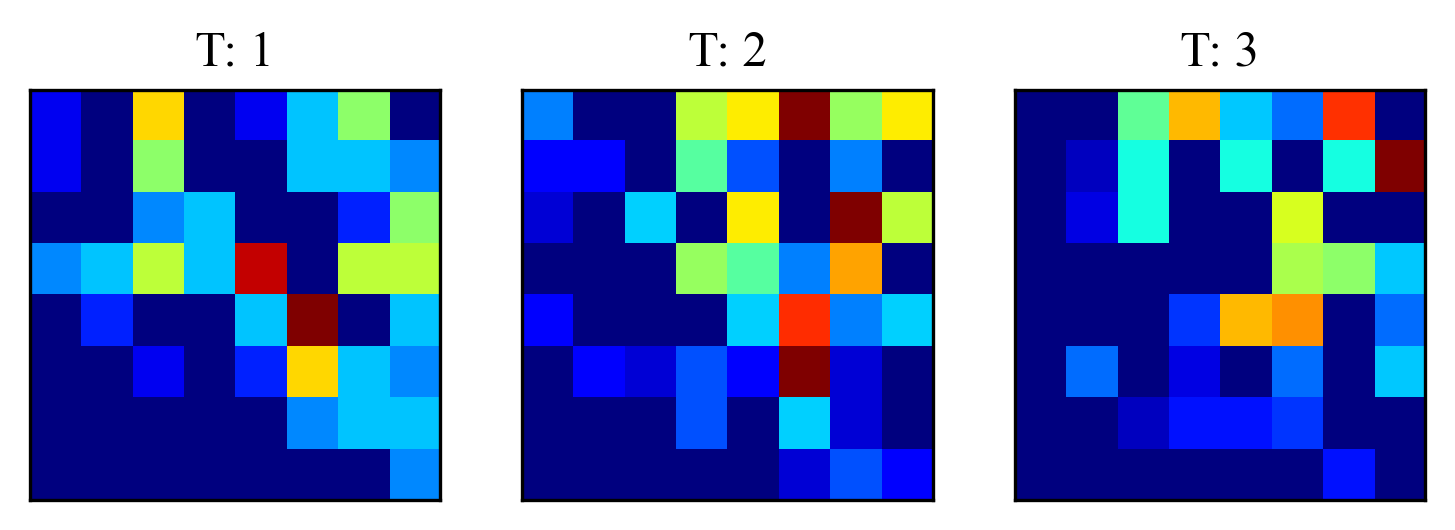

In [114]:
random_number=np.random.randint(0,Input.shape[0]-1)


plt.figure(figsize=(6,10),dpi=300)

for i in range(time_step+1):
    
    if i!=time_step:
        plt.subplot(1,time_step+1,i+1)
        plt.imshow(Input[random_number,i,:,:],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        plt.title('T: '+str(i+1))

    if i==time_step:
        
        plt.subplot(1,time_step+1,i+1)
        plt.imshow(output[random_number,:,:],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        plt.title('T: '+str(i+1))

plt.show()    

### Normalization

In [115]:
Mean=np.mean(Input)
Std=np.std(Input)

Normalized_Input=(Input-Mean)/Std
Normalized_Input.max(),Normalized_Input.min()


(53.76354, -0.25220674)

### ML Input data

In [ ]:
Normalized_Input.shape,output.shape

In [117]:
n_samples=Normalized_Input.shape[0]
time_step=Normalized_Input.shape[1]
width=Normalized_Input.shape[2]
height=Normalized_Input.shape[3]

n_features=time_step*width*height

X=np.zeros((n_samples,n_features),dtype='float32')


output_element=width*height
Y=np.zeros((n_samples,output_element),dtype='float32')

for i in range(n_samples):
    
    X[i]=Normalized_Input[i].flatten()
    Y[i]=output[i].flatten()
    


In [118]:
X.shape

(730, 128)

In [119]:
Y.shape

(730, 64)

### Shuffling and splitting

In [120]:
indexes = np.arange(X.shape[0])

np.random.shuffle(indexes)
train_index = indexes[0: int(0.9 * X.shape[0])]
test_index = indexes[int(0.9 * X.shape[0]):]

x_train = X[train_index]
x_test = X[test_index]

y_train = Y[train_index]
y_test = Y[test_index]

In [121]:
print('X Train shape: ',x_train.shape)
print('Y Train shape: ',y_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Test shape: ',y_test.shape)

X Train shape:  (657, 128)
Y Train shape:  (657, 64)
X Test shape:  (73, 128)
Y Test shape:  (73, 64)


### Training

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
regr = RandomForestRegressor(n_estimators=20,max_depth=20, random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=20, random_state=0)

### Evaluation

In [132]:
y_pred=regr.predict(x_test)

In [133]:
from sklearn.metrics import median_absolute_error

In [134]:
mean_absolute_error(y_test, y_pred)

29.452660194491607

In [135]:
median_absolute_error(y_test, y_pred)

12.489915785299825

### Predicted map visuzalization

In [136]:
y_pred.shape

(73, 64)

In [137]:
n_sample_test=y_pred.shape[0]
width=8
height=8

y_pred_reshaped=np.zeros((n_sample_test,width,height),dtype='float32')

for i in range(n_sample_test):
    y_pred_reshaped[i]=y_pred[i].reshape(width,heigh)

y_pred_reshaped.shape

(73, 8, 8)

In [138]:
x_test.shape

(73, 128)

In [139]:
x_test_original=Normalized_Input[test_index]
x_test_original.shape

(73, 2, 8, 8)

In [142]:
y_test_original=output[test_index]
y_test_original.shape

(73, 8, 8)

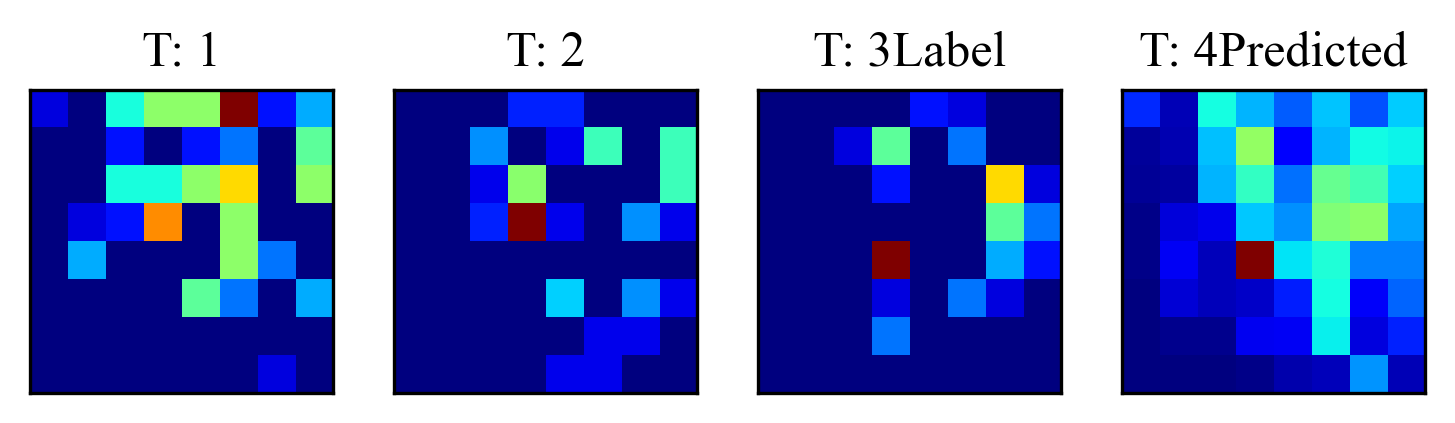

In [146]:
random_number=np.random.randint(0,y_pred_reshaped.shape[0]-1)
time_step=x_test_original.shape[1]


plt.figure(figsize=(6,10),dpi=300)

for i in range(time_step+2):
    
    if i<time_step:
        plt.subplot(1,time_step+2,i+1)
        plt.imshow(x_test_original[random_number,i,:,:],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        plt.title('T: '+str(i+1))

    if i==time_step:
        
        plt.subplot(1,time_step+2,i+1)
        plt.imshow(y_test_original[random_number,:,:],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        plt.title('T: '+str(i+1)+str('Label'))

    if i==time_step+1:
        
        plt.subplot(1,time_step+2,i+1)
        plt.imshow(y_pred_reshaped[random_number,:,:],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        plt.title('T: '+str(i+1)+str('Predicted'))

plt.show()    

In [154]:
random_number=np.random.randint(0,y_pred_reshaped.shape[0]-1)


plt.figure(figsize=(4,3),dpi=200)
plt.plot(y_pred.flatten(),color='b',label='Prediction')
plt.plot(y_test.flatten(),color='r',label='Label',alpha=0.3)
plt.xlabel('Pixels')
plt.ylabel('Demand')

plt.legend()

plt.show()

In [153]:
%matplotlib
%matplotlib

Using matplotlib backend: <object object at 0x000001E510157590>
Using matplotlib backend: QtAgg


In [151]:
y_pred.flatten().shape

(4672,)